In [1]:
from __future__ import division
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('nyc_airbnb'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_style('darkgrid')
matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

In [2]:
x = pd.read_csv('SVMData/exploratory_train_feat.csv')
y = pd.read_csv('SVMData/exploratory_test_feat.csv')
data = pd.concat([x, y])

print('Number of features: %s' %data.shape[1])
print('Number of examples: %s' %data.shape[0])
print(data.shape)

Number of features: 34
Number of examples: 225642
(225642, 34)


In [3]:
data.head().append(data.tail())

,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,...,truth,username,course_id,age,gender,education,user_enroll_num,course_enroll_num,cluster_label,course_category
0,772,2,2,0,0,0,0,0,0,0,...,1,5981,course-v1:TsinghuaX+70800232X+2015_T2,29,1,3,6,1333,2,0
1,773,21,21,6,4,3,0,1,0,0,...,1,1544995,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,2,1333,2,0
2,774,74,74,9,14,10,1,8,0,0,...,1,1072798,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,5,1333,2,0
3,776,19,19,0,3,3,1,2,0,0,...,0,561867,course-v1:TsinghuaX+70800232X+2015_T2,37,2,6,6,1333,2,0
4,777,4,4,0,0,0,0,0,0,0,...,1,1368125,course-v1:TsinghuaX+70800232X+2015_T2,0,0,0,11,1333,3,0
67694,393203,4,4,0,0,1,0,1,0,0,...,1,29394,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,28,2,3,6,735,2,0
67695,393204,4,4,0,0,1,0,1,0,0,...,1,3238122,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,0,0,0,4,735,2,0
67696,131061,2,2,0,0,0,0,0,0,0,...,1,1103805,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,0,0,0,3,687,2,0
67697,131065,6,6,0,0,0,0,1,0,0,...,1,79648,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,31,1,1,6,687,2,0
67698,393214,3,3,0,0,0,0,0,0,0,...,1,2957641,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,0,0,0,5,735,2,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225642 entries, 0 to 67698
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   enroll_id                    225642 non-null  int64 
 1   all#count                    225642 non-null  int64 
 2   session#count                225642 non-null  int64 
 3   seek_video#num               225642 non-null  int64 
 4   play_video#num               225642 non-null  int64 
 5   pause_video#num              225642 non-null  int64 
 6   stop_video#num               225642 non-null  int64 
 7   load_video#num               225642 non-null  int64 
 8   problem_get#num              225642 non-null  int64 
 9   problem_check#num            225642 non-null  int64 
 10  problem_save#num             225642 non-null  int64 
 11  reset_problem#num            225642 non-null  int64 
 12  problem_check_correct#num    225642 non-null  int64 
 13  problem_check_i

In [5]:
data.describe()

,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,...,close_courseware#num,truth,username,age,gender,education,user_enroll_num,course_enroll_num,cluster_label,course_category
count,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,...,225642.000000,225642.000000,2.256420e+05,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000
mean,232145.016132,186.624839,186.624839,11.411373,21.694711,26.666764,37.335376,13.472035,14.588853,5.403139,...,12.810576,0.758427,1.679974e+06,8.266994,0.556545,0.687394,6.086048,1481.760275,1.984976,0.009169
std,135811.381570,808.389335,808.389335,46.952168,73.110551,79.952098,629.627297,28.010300,343.981753,17.666374,...,27.590662,0.428038,1.611611e+06,13.779072,0.713448,1.362421,11.349781,1073.741787,0.755135,0.300121
min,772.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,1.000000,244.000000,0.000000,0.000000
25%,117248.500000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,4.698862e+05,0.000000,0.000000,0.000000,2.000000,657.000000,2.000000,0.000000
50%,227109.500000,29.000000,29.000000,0.000000,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,...,2.000000,1.000000,1.091675e+06,0.000000,0.000000,0.000000,3.000000,1063.000000,2.000000,0.000000
75%,351167.750000,138.000000,138.000000,5.000000,15.000000,19.000000,4.000000,12.000000,8.000000,2.000000,...,11.000000,1.000000,2.655941e+06,22.000000,1.000000,1.000000,6.000000,2018.000000,2.000000,0.000000
max,466786.000000,128992.000000,128992.000000,3456.000000,8771.000000,8698.000000,67948.000000,930.000000,128948.000000,549.000000,...,827.000000,1.000000,7.059814e+06,70.000000,2.000000,7.000000,200.000000,4253.000000,4.000000,18.000000


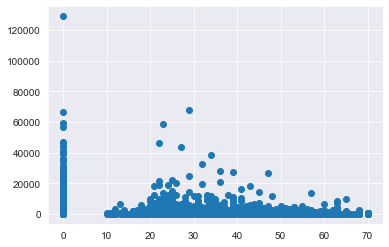

In [12]:
age = data['age']
allcount = data['all#count']
plt.plot(age, allcount, 'o')

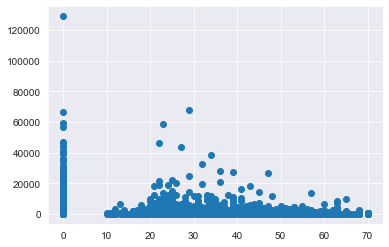

In [13]:
plt.scatter(age, allcount)

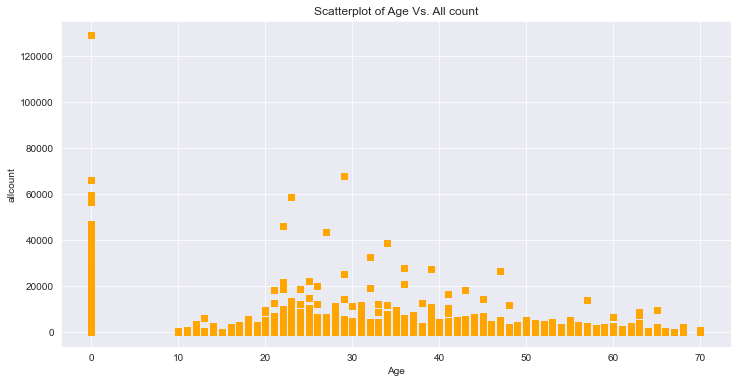

In [14]:
plt.figure(figsize = (12, 6))
plt.scatter(age, allcount, marker = 's', color='orange')
plt.xlabel('Age')
plt.ylabel('allcount')
plt.title('Scatterplot of Age Vs. All count')
plt.show()

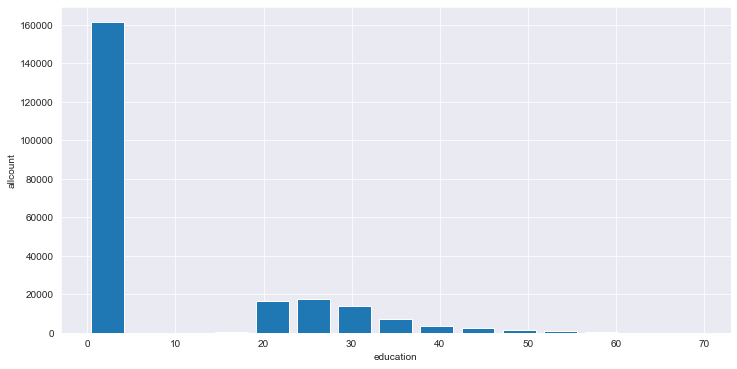

In [15]:
#HISTOGRAM
plt.figure(figsize = (12, 6))
plt.hist(data['age'], bins=15, rwidth=0.8 )
plt.xlabel('education')
plt.ylabel('allcount')
plt.show()

In [16]:
procdata_by_count = data.groupby(['age'], as_index=False).sum()
procdata_by_count

,age,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,...,click_progress#num,close_courseware#num,truth,username,gender,education,user_enroll_num,course_enroll_num,cluster_label,course_category
0,0,37732068826,29518467,29518467,1710163,3270896,4164288,6507505,2143948,2032862,...,173687,2011438,123891,336650030319,43854,24735,762829,245525881,322373,182
1,10,667324,533,533,70,46,72,52,47,11,...,13,44,2,2805194,2,0,4,1996,4,0
2,11,1219576,1270,1270,39,274,310,24,104,61,...,5,105,5,2669202,6,4,20,11184,16,0
3,12,2991147,5527,5527,541,1450,1397,75,306,405,...,3,372,6,9677019,12,4,101,12930,2,0
4,13,298206,6632,6632,592,862,1057,15,272,1444,...,46,485,1,5553658,4,8,5,2773,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,65,1715428,17155,17155,1165,5049,5004,2682,434,399,...,41,629,4,3073756,16,34,36,14478,20,0
57,66,244761,359,359,0,0,43,0,49,76,...,0,31,0,117996,2,2,4,1635,4,0
58,67,173716,29,29,4,15,6,0,2,0,...,0,1,1,386454,2,2,4,2098,4,0
59,68,24469104,28277,28277,1075,862,1494,1733,708,4757,...,1593,1806,71,168245008,119,345,2186,93478,224,0


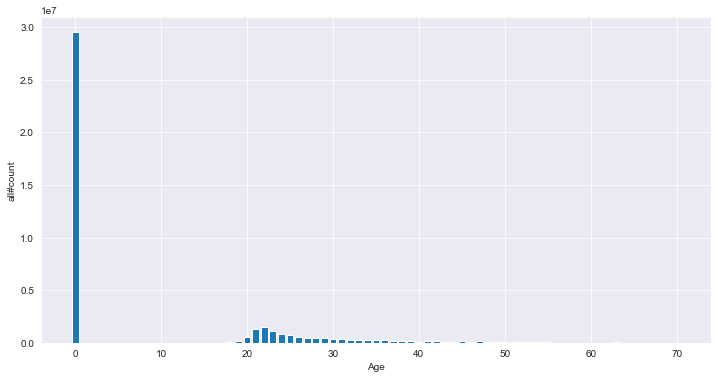

In [17]:
plt.figure(figsize = (12, 6))
plt.bar(procdata_by_count['age'], procdata_by_count['all#count'])
plt.xlabel('Age')
plt.ylabel('all#count')
plt.show()

In [18]:
procdata[0:10].plot(kind = 'bar', x = 'education', y = 'session#count')
plt.show()

NameError: name 'procdata' is not defined

In [19]:
byeducation = data.groupby(['education'], as_index = False).sum()
byeducation

,education,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,...,click_progress#num,close_courseware#num,truth,username,age,gender,user_enroll_num,course_enroll_num,cluster_label,course_category
0,0,35576907496,27727745,27727745,1623290,3084774,3893157,6153142,2016577,1919975,...,160837,1882275,117274,315725896710,83816,33659,689046,232788298,304301,384
1,1,8942918720,6999157,6999157,466434,881727,1018190,1110930,492066,689052,...,61566,490657,29232,32933014214,931870,48759,417916,53745908,75927,924
2,2,2931891365,3614877,3614877,230087,433524,553734,535617,267632,297990,...,28884,271410,8030,16449709233,228637,15650,69923,18895971,25461,79
3,3,2997796347,2140893,2140893,132043,278124,307744,363345,152951,219003,...,18927,142895,10203,8294324762,382557,16953,119351,17543469,25651,387
4,4,50079276,45720,45720,2963,5980,7555,2701,3496,5092,...,495,3676,166,231287533,3792,248,1613,283845,440,0
5,5,170879729,130043,130043,9741,18815,20739,8167,8492,22486,...,839,7405,560,672453573,13846,868,5366,822060,1325,2
6,6,1263422501,1164594,1164594,88305,162904,181351,200570,78202,100880,...,9192,72682,4146,3504452715,168463,7093,48105,7804251,10977,182
7,7,447770296,287373,287373,22022,29390,34672,49957,20441,37380,...,2082,19604,1522,1261598504,52400,2350,21948,2463550,3812,111


In [20]:
bygender = data.groupby(['gender'], as_index = False).sum()
bygender

,gender,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,...,click_progress#num,close_courseware#num,truth,username,age,education,user_enroll_num,course_enroll_num,cluster_label,course_category
0,0,30265571205,21639843,21639843,1310904,2476026,3011971,4977815,1583112,1482158,...,117377,1445486,102528,249886178738,16042,2944,614892,194729995,263239,34
1,1,15265324440,13492556,13492556,782958,1541905,1904777,2241047,1003261,1321158,...,106710,1001181,47848,78581341436,1325104,109064,596390,94918928,124821,1741
2,2,6850770085,6978003,6978003,481023,877307,1100394,1205567,453484,488542,...,58735,443937,20757,50605217070,524235,43097,161986,44698429,59834,294


In [22]:
byuser_cluster = data.groupby(['cluster_label'], as_index = False).sum()
byuser_cluster

,cluster_label,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,...,click_progress#num,close_courseware#num,truth,username,age,gender,education,user_enroll_num,course_enroll_num,course_category
0,0,3743046682,2886606,2886606,201408,382593,361777,389501,234360,541220,...,13120,193572,13280,8664014935,229555,9982,17130,247097,22830981,417
1,1,1683265629,3006324,3006324,107090,248267,427886,513773,223355,233726,...,19610,236066,2374,31365371121,11177,7844,1918,20028,15864074,0
2,2,40315123769,27920018,27920018,1909801,3363356,4167007,5063571,1944014,2189258,...,201049,1827408,138852,319158138786,1279379,90391,109346,707694,239803641,1415
3,3,4180853425,2891900,2891900,181542,425098,412138,542186,229204,170661,...,24555,209592,13622,11880861347,302109,13589,22721,365424,33847891,192
4,4,2459376225,5405554,5405554,175044,475924,648334,1915398,408924,156993,...,24488,423966,3005,8004351055,43161,3774,3990,33025,22000765,45


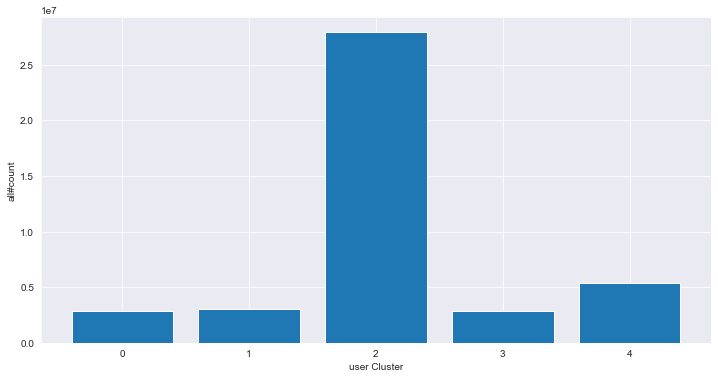

In [23]:
#barchart
plt.figure(figsize = (12, 6))
plt.bar(byuser_cluster['cluster_label'], byuser_cluster['all#count'])
plt.xlabel('user Cluster')
plt.ylabel('all#count')
plt.show()

In [24]:
byC = data.groupby(['cluster_label', 'seek_video#num'], as_index = False).sum()
byC

,cluster_label,seek_video#num,enroll_id,all#count,session#count,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,...,click_progress#num,close_courseware#num,truth,username,age,gender,education,user_enroll_num,course_enroll_num,course_category
0,0,0,2113982379,519238,519238,16119,20500,100555,29154,216042,...,2651,30224,8205,4578059485,133519,5812,9749,154499,12232529,184
1,0,1,217832032,88775,88775,8729,9139,20946,8962,7413,...,647,8889,781,529554461,12261,534,970,13043,1324569,85
2,0,2,151911891,72538,72538,7613,7056,16578,6372,13469,...,342,6131,533,345229905,8516,387,690,9314,902536,26
3,0,3,109268530,69373,69373,7307,7176,20781,5682,7028,...,249,5302,405,276766796,6139,258,456,6440,697163,17
4,0,4,90887902,43789,43789,5754,5485,2832,5131,4507,...,254,5209,327,225671175,5400,230,394,5071,581112,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,4,919,153691,1749,1749,140,191,43,121,10,...,0,89,0,725058,0,0,0,2,3095,0
1763,4,953,157039,3144,3144,490,616,73,195,18,...,0,198,0,570388,0,0,0,2,3095,0
1764,4,1119,91439,1355,1355,64,44,18,51,26,...,0,6,0,725486,0,0,0,3,1149,0
1765,4,1303,52697,3284,3284,654,586,447,95,59,...,0,69,0,521917,24,2,1,3,1770,0


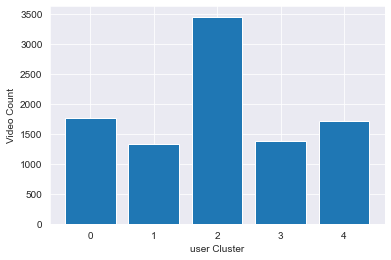

In [60]:
byC.unstack()
plt.bar(byC['cluster_label'], byC['seek_video#num'])
plt.xlabel('user Cluster')
plt.ylabel('Video Count')
plt.show()

KeyError: 'sto_video#num'

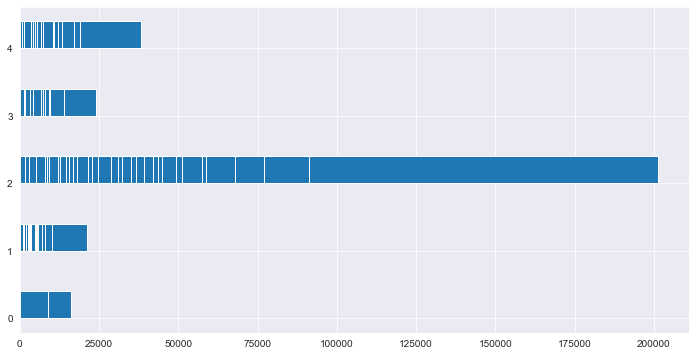

In [31]:
#overlapping bars --- stacked bar charts
plt.figure(figsize = (12, 6))
plt.barh(byC['cluster_label'], byC['play_video#num'],
        align = 'edge', height= 0.4)
plt.barh(byC['cluster_label'], byC['sto_video#num'],
        align = 'edge', height= -0.4)
plt.ylabel('EDUCATION')
plt.legend(['Play', 'stop'])
plt.show()

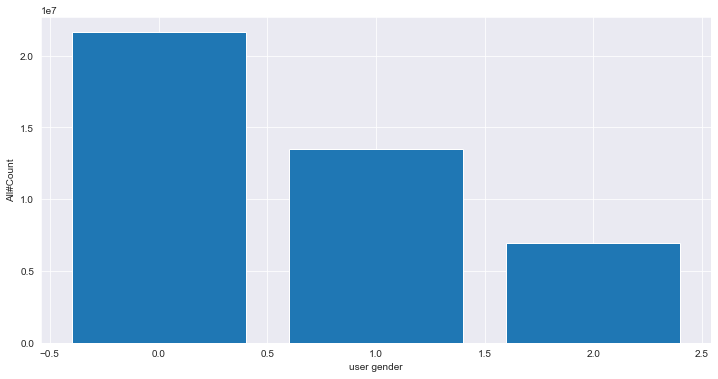

In [26]:
#barchart
plt.figure(figsize = (12, 6))
plt.bar(bygender['gender'], bygender['all#count'])
plt.xlabel('user gender')
plt.ylabel('All#Count')
plt.show()

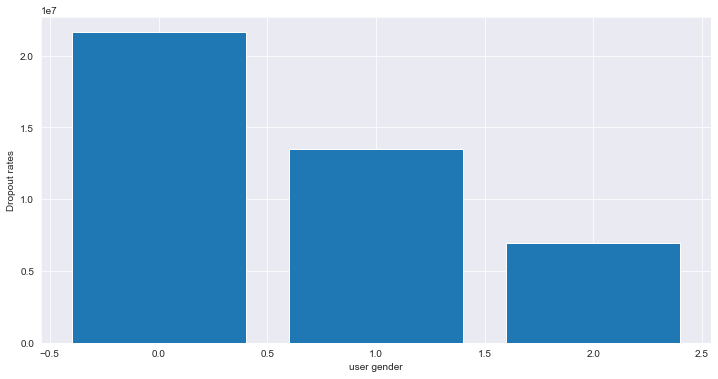

In [30]:
#barchart
plt.figure(figsize = (12, 6))
plt.bar(bygender['gender'], bygender['all#count'])
plt.xlabel('user gender')
plt.ylabel('Dropout rates')
plt.show()

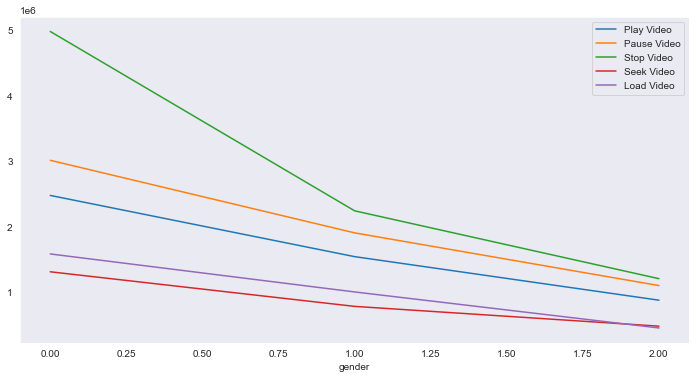

In [38]:
plt.figure(figsize = (12, 6))
plt.plot(bygender['gender'], bygender['play_video#num'])
plt.plot(bygender['gender'], bygender['pause_video#num'])
plt.plot(bygender['gender'], bygender['stop_video#num'])
plt.plot(bygender['gender'], bygender['seek_video#num'])
plt.plot(bygender['gender'], bygender['load_video#num'])
plt.legend(['Play Video', 'Pause Video', 'Stop Video', 'Seek Video', 'Load Video'])
plt.xlabel('gender')
plt.grid()
plt.show()

In [66]:
#Group By User Education
byedu = data.groupby('education', as_index = False).sum()
byedu

,education,enroll_id,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,...,click_progress#num,close_courseware#num,truth,username,age,gender,user_enroll_num,course_enroll_num,cluster_label,course_category
0,0,35576907496,27727745,27727745,1623290,3084774,3893157,6153142,2016577,1919975,...,160837,1882275,117274,315725896710,83816,33659,689046,232788298,304301,384
1,1,8942918720,6999157,6999157,466434,881727,1018190,1110930,492066,689052,...,61566,490657,29232,32933014214,931870,48759,417916,53745908,75927,924
2,2,2931891365,3614877,3614877,230087,433524,553734,535617,267632,297990,...,28884,271410,8030,16449709233,228637,15650,69923,18895971,25461,79
3,3,2997796347,2140893,2140893,132043,278124,307744,363345,152951,219003,...,18927,142895,10203,8294324762,382557,16953,119351,17543469,25651,387
4,4,50079276,45720,45720,2963,5980,7555,2701,3496,5092,...,495,3676,166,231287533,3792,248,1613,283845,440,0
5,5,170879729,130043,130043,9741,18815,20739,8167,8492,22486,...,839,7405,560,672453573,13846,868,5366,822060,1325,2
6,6,1263422501,1164594,1164594,88305,162904,181351,200570,78202,100880,...,9192,72682,4146,3504452715,168463,7093,48105,7804251,10977,182
7,7,447770296,287373,287373,22022,29390,34672,49957,20441,37380,...,2082,19604,1522,1261598504,52400,2350,21948,2463550,3812,111


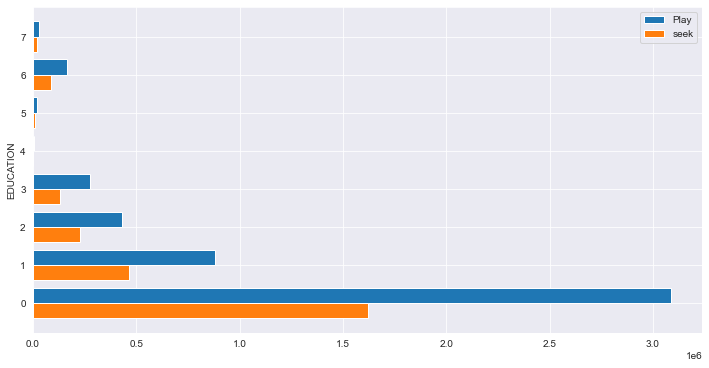

In [67]:
#overlapping bars --- stacked bar charts
plt.figure(figsize = (12, 6))
plt.barh(byedu['education'], byedu['play_video#num'],
        align = 'edge', height= 0.4)
plt.barh(byedu['education'], byedu['seek_video#num'],
        align = 'edge', height= -0.4)
plt.ylabel('EDUCATION')
plt.legend(['Play', 'seek'])
plt.show()

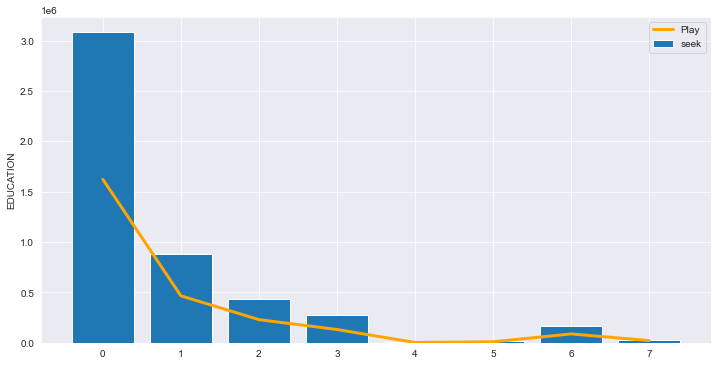

In [68]:
#overlapping bars --- stacked bar charts
plt.figure(figsize = (12, 6))
plt.plot(byedu['education'], byedu['seek_video#num'],
        linewidth = 3, color = 'orange')
plt.bar(byedu['education'], byedu['play_video#num'])
plt.ylabel('EDUCATION')
plt.legend(['Play', 'seek'])
plt.show()

In [120]:
#creating helper objects
education = np.array(byedu['education'])
counts = np.array(byedu['all#count'])
education = np.round(education, 0)
counts = counts.astype(int)
counts

array([27727745,  6999157,  3614877,  2140893,    45720,   130043,
        1164594,   287373])

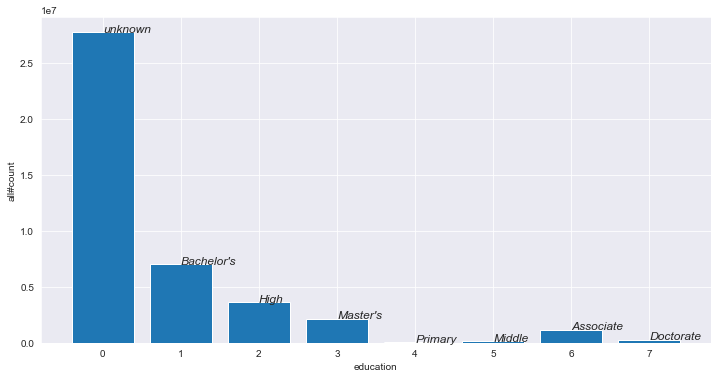

In [122]:
plt.figure(figsize = (12, 6))
plt.bar(byedu['education'], byedu['all#count'])
plt.xlabel('education')
plt.ylabel('all#count')
edus = ["unknown","Bachelor's","High", "Master's", "Primary", "Middle","Associate","Doctorate"]
for i in range(len(education)):
    plt.annotate(s = (str(edus[i])), xy = (education[i], counts[i]),
                fontsize = 'large', fontstyle = 'oblique')
plt.show()    


In [ ]:
course = pd.read_csv('')

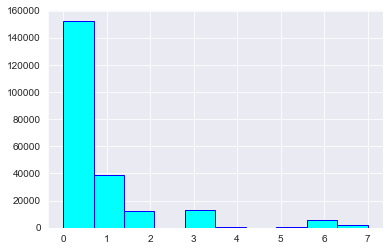

In [127]:

plt.hist(data['education'], 
         facecolor='cyan', 
         edgecolor='blue', 
         bins=10)

plt.show()

In [130]:
#Nodes with maximum click counts
top_3_hosts = (pd.DataFrame(data['all#count'].value_counts())).head(3)
top_3_hosts.columns=['Listings']
top_3_hosts['all#count'] = top_3_hosts.index
top_3_hosts.reset_index(drop=True, inplace=True)
top_3_hosts

,Listings,all#count
0,13642,4
1,10929,2
2,7609,6


In [33]:
#education top nodes with maximum click counts
top_3_hosts = (pd.DataFrame(data['education'].value_counts())).head(3)
top_3_hosts.columns=['Listings']
top_3_hosts['education'] = top_3_hosts.index
top_3_hosts.reset_index(drop=True, inplace=True)
top_3_hosts

,Listings,education
0,152480,0
1,39102,1
2,13199,3


In [134]:
#user clusters top nodes with maximum click counts
top_3_hosts = (pd.DataFrame(data['cluster_label'].value_counts())).head(3)
top_3_hosts.columns=['Listings']
top_3_hosts['cluster_label'] = top_3_hosts.index
top_3_hosts.reset_index(drop=True, inplace=True)
top_3_hosts

,Listings,cluster_label
0,173958,2
1,19020,3
2,16695,0


In [139]:
#data_check_distrib=data.drop(data[pd.isnull(data.reviews_per_month)].index)

{"Mean":np.nanmean(data['play_video#num']),"Median":np.nanmedian(data['play_video#num']),
 "Standard Dev":np.nanstd(data['play_video#num'])}

{'Mean': 21.694711091020288, 'Median': 2.0, 'Standard Dev': 73.11038907952103}

In [140]:
def impute_median(series):
    return series.fillna(series.median())

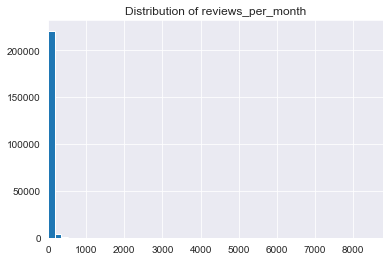

In [144]:
plt.hist(data['play_video#num'],  bins=50)
plt.title("Distribution of reviews_per_month")
plt.xlim((min(data['play_video#num']), max(data['play_video#num'])))
plt.show()

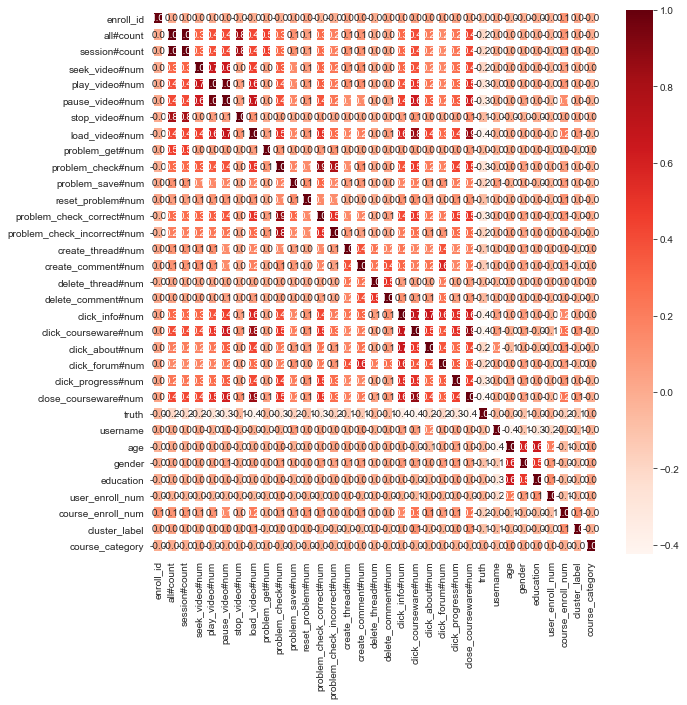

In [156]:
pdata = pd.read_csv('DeepFMDummy.csv')
pdata= data.drop(data['truth'])
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(pdata.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax, cmap='Reds')
plt.show()

In [3]:
user = pd.read_csv('Datasets/user_info.csv')
user.describe()

,user_id,birth
count,9.627148e+06,481422.000000
mean,5.329210e+06,1990.901448
std,3.006319e+06,10.714057
min,1.000000e+00,996.000000
25%,2.662156e+06,1989.000000
50%,5.378486e+06,1993.000000
75%,7.983053e+06,1995.000000
max,1.044314e+07,7381.000000
